In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv("Iris.csv")
data.head(5) 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
data.drop(['Id'],axis=1,inplace=True)

In [9]:
data.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [11]:
#select features for clustering
data_for_clustering=data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

In [12]:
#choose number of clusters
k=3

In [13]:
#apply k-means clustering
from sklearn.cluster import KMeans
km=KMeans(n_clusters=k,random_state=10)
km.fit(data_for_clustering)

C:\Users\bhagy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bhagy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=10)

In [14]:
#Add cluster label to the dataframe.

data['Clusters']=km.labels_

#These labels are then added as a new column named 'Clusters' to the original dataframe(data)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Clusters
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,0
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,0
148,6.2,3.4,5.4,2.3,Iris-virginica,0


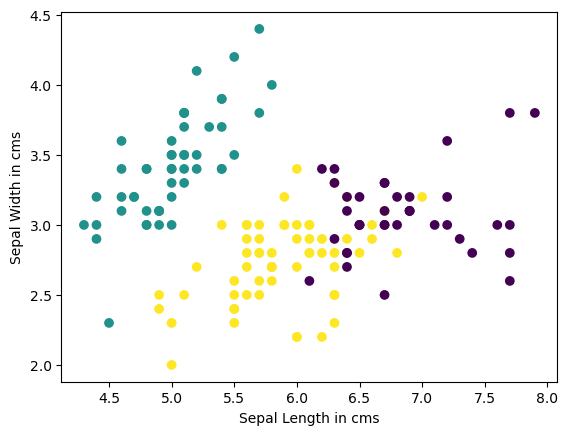

In [15]:
#visualize the clusters based on Sepal

plt.scatter(data['SepalLengthCm'],data['SepalWidthCm'],c=data['Clusters'],cmap='viridis')
plt.xlabel('Sepal Length in cms')
plt.ylabel('Sepal Width in cms')
plt.show()

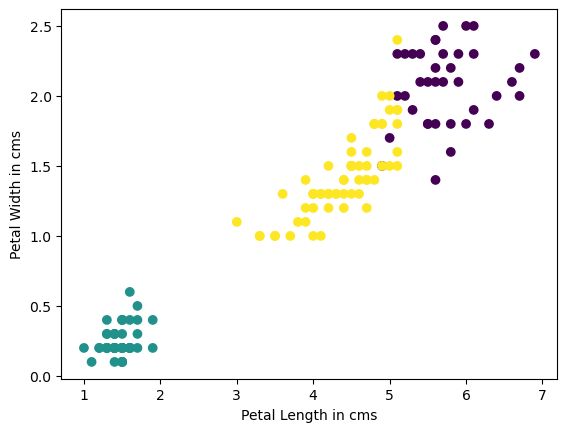

In [16]:
#visualize the clusters based on Petal
plt.scatter(data['PetalLengthCm'],data['PetalWidthCm'],c=data['Clusters'],cmap='viridis')
plt.xlabel('Petal Length in cms')
plt.ylabel('Petal Width in cms')
plt.show()

In [17]:
#print the cluster centroid
cluster_centers=pd.DataFrame(data=km.cluster_centers_,columns=data_for_clustering.columns)
print('Cluster centers:')
print(cluster_centers)

Cluster centers:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0       6.850000      3.073684       5.742105      2.071053
1       5.006000      3.418000       1.464000      0.244000
2       5.901613      2.748387       4.393548      1.433871


C:\Users\bhagy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bhagy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\bhagy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bhagy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

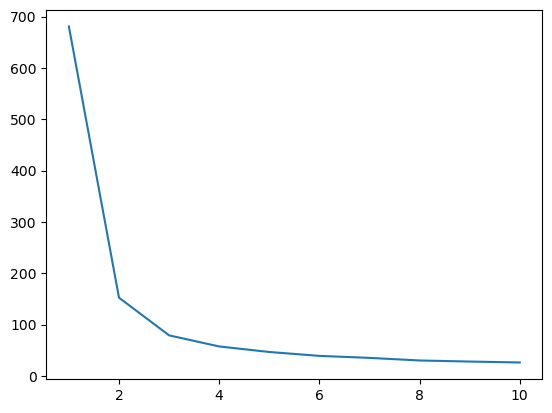

In [18]:
wcss_list=[]
for i in range(1,11):
  km=KMeans(n_clusters=i)
  km.fit(data_for_clustering)
  wcss=sum((np.min(km.transform(data_for_clustering),axis=1))**2)
  wcss_list.append(wcss)
wcss_list
plt.plot(range(1,11),wcss_list)